# Ioannou_Georgios


## Copyright © 2022 by Georgios Ioannou


___
<h1 align="center"> Image Classification </h1>

In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.


___
<h2 align="center"> Remember our main steps motto "ISBE". </h2>

<h3 align="center"> Main Steps when building a Machine Learning Model. </h3>

1. <b>I</b> - Inspect and explore data.
2. <b>S</b> - Select and engineer features.
3. <b>B</b> - Build and train model.
4. <b>E</b> - Evaluate model.


___
<h2 align="center"> Libraries </h2>


In [1]:
# import libraries.

# Use inline so our visualizations display in notebook.

%matplotlib inline


import matplotlib.pyplot as plt # matplotlib for visualization.
import numpy as np              # numpy for data wrangling.
import pandas as pd             # pandas for data wrangling.

from skimage import io                               # utilities to read and write images in various formats.
from sklearn import metrics                          # metrics contain our classification_report.
from sklearn import svm                              # support vector machine.
from sklearn import tree                             # import the trees from sklearn.
from skimage.color import rgb2gray                   # convert an image with RGB channels into an image with a single grayscale channel.
from sklearn.ensemble import RandomForestClassifier  # import our Random Forest.
from sklearn.linear_model import LogisticRegression  # import our Logistic Reression.
from sklearn.metrics import ConfusionMatrixDisplay   # contain our plot_confustion_matrix.
from sklearn.model_selection import train_test_split # helper function to split our data.
from sklearn.naive_bayes import MultinomialNB        # multinomial naive bayes classifier.
from sklearn.svm import SVC                          # import our c-support vector classification.


___
## #1 Inspect and Explore Data

1. Load the `fashion-small.csv` data into a pandas dataframe.
2. Inspect / remove null values.
3. Inspect / remove duplicate rows.
4. Print out the number examples in each class aka the class balances.
5. Visualize at least one image.


In [2]:
# 1. Load data into a pandas dataframe.

df = pd.read_csv('data/fashion-small.csv')
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0


### Inspect for null values

In [3]:
# 2. Inspect / remove null values.

print(df.isnull().sum())
print()
print('df.isnull().sum().sum() = ', df.isnull().sum().sum())


label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

df.isnull().sum().sum() =  0


### Check for duplicates

In [4]:
# 3. Inspect / remove duplicate rows.

print('df.duplicated().sum() = ', df.duplicated().sum())


df.duplicated().sum() =  0


### Lets look at our class balances

In [5]:
# 4. Print out the number examples in each class aka the class balances.

df.label.value_counts(), df.label.value_counts(normalize=True)


(Sandal         646
 Trouser        612
 Ankle boot     605
 Shirt          601
 Pullover       598
 Coat           597
 T-shirt/top    590
 Dress          585
 Bag            584
 Sneaker        582
 Name: label, dtype: int64,
 Sandal         0.107667
 Trouser        0.102000
 Ankle boot     0.100833
 Shirt          0.100167
 Pullover       0.099667
 Coat           0.099500
 T-shirt/top    0.098333
 Dress          0.097500
 Bag            0.097333
 Sneaker        0.097000
 Name: label, dtype: float64)

In [6]:
# 5. Visualize at least one image.

# First, we need to create a list that is just our pixel columns.

# Grabs all of the columns.
pixel_cols = df.columns

# Convert the "all" columns object into a regular list.
pixel_cols = list(pixel_cols)

# Sanity check that it is now just a list.
print(type(pixel_cols))

# Remove just the label column from the list.
pixel_cols.remove('label')


<class 'list'>


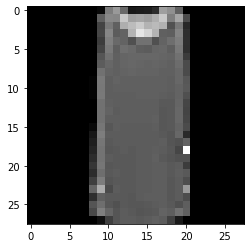

In [7]:
# Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[pixel_cols].values

# Select just one image from all the images.
img = imgs[0]

# Reshape the image to be a 28x28 matrix (original format of image).
img = img.reshape(28,28)

# Plot reshaped image.
plt.imshow(img, cmap='gray')


___
## #2 Select and Engineer Features

1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data.
2. Define our `X` and `y` data.
2. Train-test-split our `X` and `y` data.


In [8]:
# 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

# Grabs all of the columns.
selected_features = df.columns

# Convert the all columns object into a regular list.
selected_features = list(selected_features)

# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list.
# NOTE: This happnes 'in place'.
selected_features.remove('label')


<class 'list'>


In [9]:
# 2. Define our `X` and `y` data.

X = df[selected_features]

y = df['label']


In [10]:
# 3. Train-test-split our `X` and `y` data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


____
## #3 Build and Train Model

1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data.


In [11]:
# 1. Initalize an empty Support Vector Classifier model.
# Initalize our Support Vector Classifier.

model = svm.SVC()


In [12]:
# 2. Fit that model with our training data.

model.fit(X_train, y_train)


SVC()

___
## #4 Evaluate Model

1. Get a baseline accuracy score.
2. Make new predictions using our test data.
3. Print the classification report.
4. Plot the confusion matrix of our predicted results.


In [13]:
# 1. Get a baseline accuracy score.

accuracy = model.score(X_test, y_test)
print('Accuracy %f' % round((accuracy * 100), 2), '%', sep='')


Accuracy 83.800000%


In [14]:
# 2. Make new predictions using our test data.

y_pred = model.predict(X_test)


In [15]:
# 3. Print the classification report.

print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Ankle boot       0.91      0.93      0.92       149
         Bag       0.89      0.98      0.93       136
        Coat       0.76      0.77      0.76       157
       Dress       0.84      0.91      0.88       163
    Pullover       0.77      0.72      0.74       154
      Sandal       0.97      0.92      0.94       165
       Shirt       0.63      0.53      0.58       154
     Sneaker       0.85      0.90      0.88       130
 T-shirt/top       0.76      0.81      0.79       156
     Trouser       0.99      0.95      0.97       136

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500



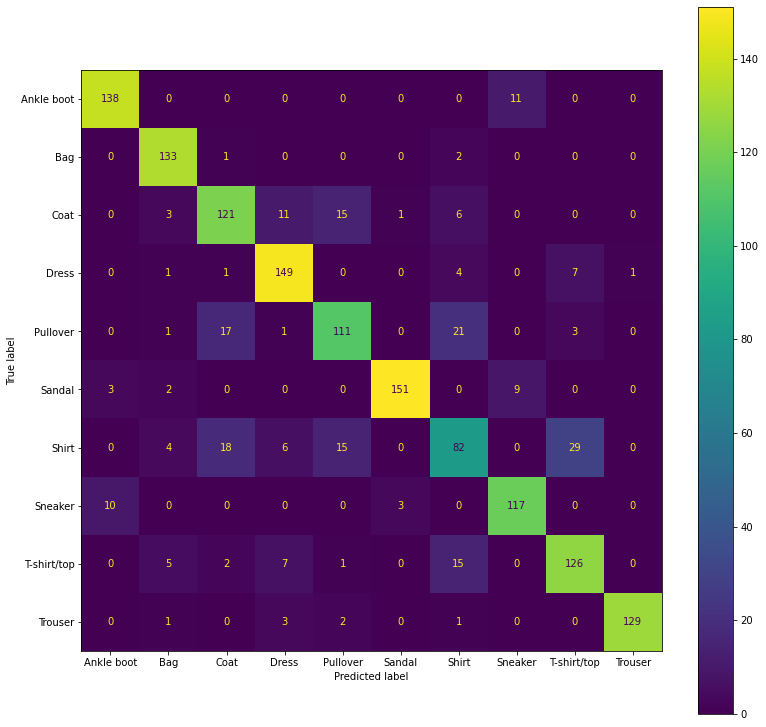

In [16]:
# 4. Plot the confusion matrix of our predicted results.

fig, ax = plt.subplots(figsize=(13,13))

ConfusionMatrixDisplay.from_estimator(estimator=model, 
                              X=X_test, 
                              y=y_test, 
                              ax=ax)


___
<h1 align="center"> <span style="color:#FFA500"> Looking at the confusion matrix, which two clothing items were mis-classified with each other the most? </span> </h1>

___
<h2 align="center"> <span style="color:#964B00"> The classifier mistaked <i> T-shirt/Top </i> and <i> Shirt </i> the most. </span> </h2>

___


# Build a `function` that its inputs are:
    1. An unfitted model
    2. X data
    3. y data
# The `function` must run the whole pipeline and print a classification report and confusion matrix. 

In [17]:
# Build a `function` that its input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

def build_and_eval_model(model, X, y, random_state=23):
    print('Running report for model', model)
    
    # Train-test-split our `X` and `y` data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    
    # Fit our model.
    model.fit(X_train, y_train)
    
    # Get the accuracy.
    accuracy = model.score(X_test, y_test)
    print("\n\nAccuracy %f" % accuracy)
    
    # Make new predictions.
    y_pred = model.predict(X_test)
    
    # Print the classification report. 
    print(metrics.classification_report(y_test, y_pred))
    
    # Plot the confusion matrix of our predicted results.
    fig, ax = plt.subplots(figsize=(13,13))
    ConfusionMatrixDisplay.from_estimator(estimator=model, 
                              X=X_test, 
                              y=y_test, 
                              ax=ax)
    
    # Return the fitted model. 
    return model


## Run:
    1. LogisticRegression
    2. RandomForest
    3. Multinomial Naive Bayes
## through the function you just built and compare the results.


Running report for model LogisticRegression()


C:\Users\GEORGIOS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Accuracy 0.812000
              precision    recall  f1-score   support

  Ankle boot       0.92      0.94      0.93       160
         Bag       0.91      0.94      0.93       148
        Coat       0.69      0.74      0.71       150
       Dress       0.80      0.83      0.81       145
    Pullover       0.76      0.73      0.74       162
      Sandal       0.93      0.86      0.90       161
       Shirt       0.61      0.52      0.56       153
     Sneaker       0.85      0.90      0.87       141
 T-shirt/top       0.69      0.74      0.71       140
     Trouser       0.94      0.94      0.94       140

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500



LogisticRegression()

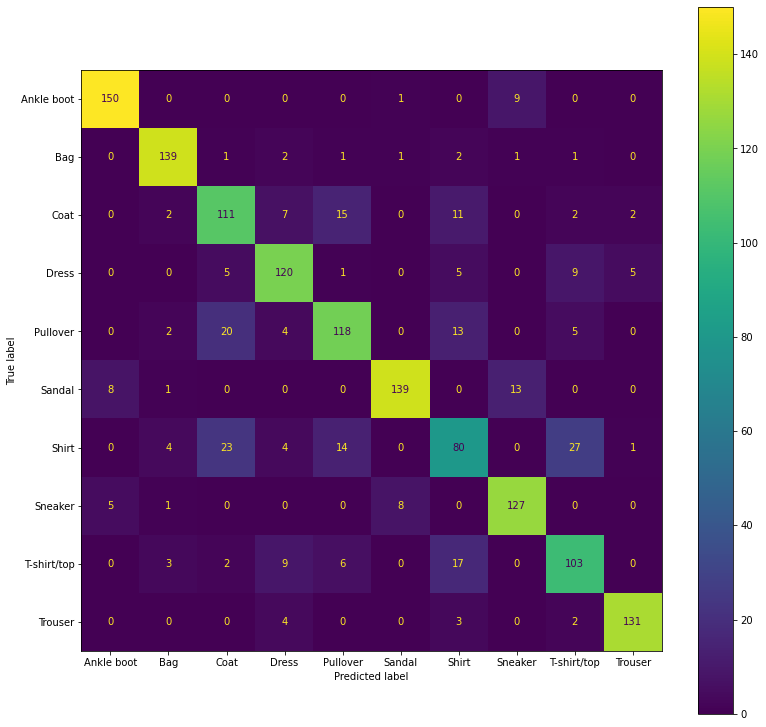

In [18]:
# LogisticRegression.

lr = LogisticRegression()
build_and_eval_model(lr, X, y)


Running report for model RandomForestClassifier()


Accuracy 0.853333
              precision    recall  f1-score   support

  Ankle boot       0.93      0.94      0.93       160
         Bag       0.91      0.97      0.94       148
        Coat       0.75      0.83      0.79       150
       Dress       0.82      0.92      0.87       145
    Pullover       0.79      0.77      0.78       162
      Sandal       0.94      0.93      0.93       161
       Shirt       0.70      0.54      0.61       153
     Sneaker       0.89      0.88      0.88       141
 T-shirt/top       0.80      0.83      0.81       140
     Trouser       0.99      0.96      0.97       140

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500



RandomForestClassifier()

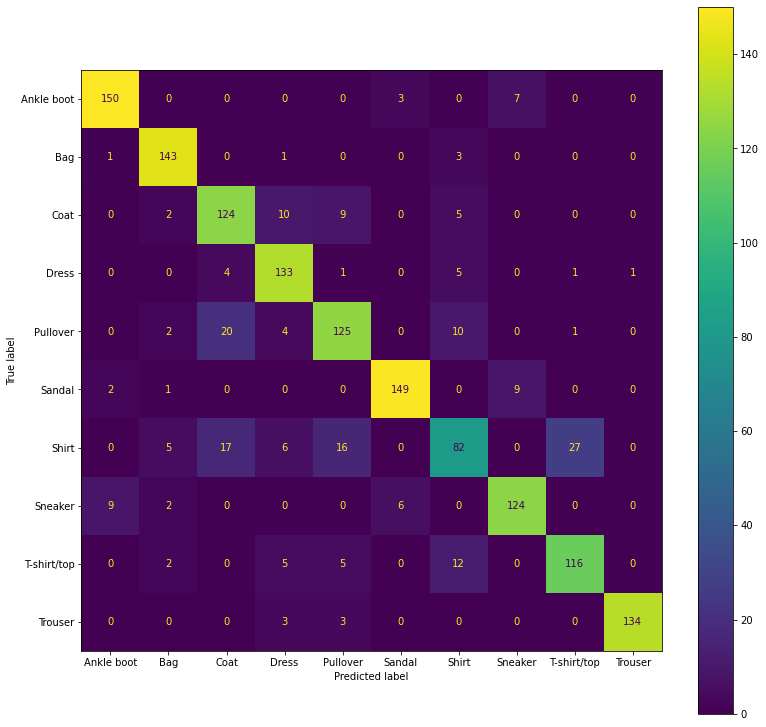

In [19]:
# RandomForest.

rf = RandomForestClassifier()
build_and_eval_model(rf, X, y)


Running report for model MultinomialNB()


Accuracy 0.652667
              precision    recall  f1-score   support

  Ankle boot       0.70      0.86      0.78       160
         Bag       0.87      0.84      0.85       148
        Coat       0.44      0.59      0.50       150
       Dress       0.67      0.90      0.77       145
    Pullover       0.67      0.60      0.64       162
      Sandal       0.78      0.09      0.16       161
       Shirt       0.28      0.13      0.18       153
     Sneaker       0.53      0.91      0.67       141
 T-shirt/top       0.72      0.80      0.76       140
     Trouser       0.96      0.90      0.93       140

    accuracy                           0.65      1500
   macro avg       0.66      0.66      0.62      1500
weighted avg       0.66      0.65      0.62      1500



MultinomialNB()

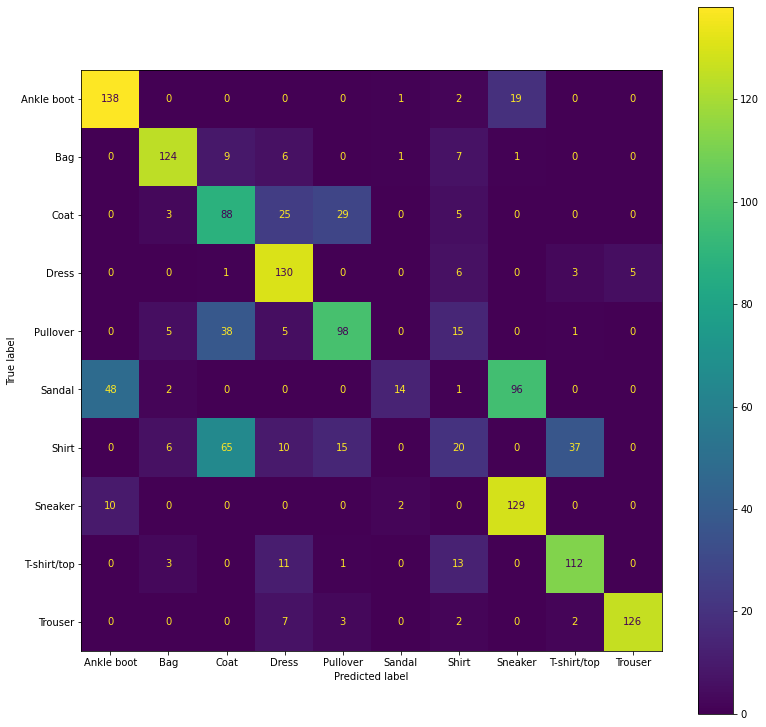

In [20]:
# MultinomialNB.

mnb = MultinomialNB()
build_and_eval_model(mnb, X, y)


___
<h1 align="center"> <span style="color:#FFA500"> Which classifier did the best, and which classifier did the worst? </span> </h1>

___
<h2 align="center"> <span style="color:#964B00"> The <i> Support Vector Classifier </i> model did the best and <i> Multinomial Naive Bayes </i> model did the worst. </span> </h2>

___


# Dope Extra Credit
### This is going to take some python trickery to get working.  The files are large, in all sorts of strange directories, and in color.  This will not only challenge your data science skills, but also your general 'hacker' skills. 

* Use this data provided Intel to build a classifier for color images in directories: 
* [https://www.kaggle.com/datasets/puneet6060/intel-image-classification](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)
* If you have any issues, just slack me.  I got slack on my phone and love hearing your battle stories 